# Problem Statement: Bengali MNIST Digit Recognition

## Background
In the realm of digit recognition, the MNIST dataset has been a benchmark for testing various machine learning and deep learning algorithms. However, there is a growing need to extend these capabilities to non-Latin scripts to address the diverse linguistic landscape. Bengali, being the fifth most spoken language in the world, presents an excellent opportunity to explore digit recognition in a non-Latin script context.

## Objective
The primary objective of this project is to develop a Convolutional Neural Network (CNN) model that can accurately recognize and classify handwritten Bengali digits. The model should be trained on the Bengali MNIST dataset and evaluated for its accuracy and robustness in recognizing Bengali digits.

## Data
The dataset consists of grayscale images of handwritten Bengali digits, along with their corresponding labels. The images are in a format similar to the original MNIST dataset, but they represent Bengali numerals (0-9). The data is split into training, validation, and test sets to ensure proper evaluation of the model.

## Goals
1. **Preprocess the Data**:
   - Load the images from the file system.
   - Normalize the pixel values.
   - Encode the labels into a format suitable for training.

2. **Build the CNN Model**:
   - Design a CNN architecture tailored for digit recognition.
   - Optimize the model architecture through experimentation with different hyperparameters.

3. **Train the Model**:
   - Use the training dataset to train the CNN model.
   - Implement validation mechanisms to tune the model and prevent overfitting.

4. **Evaluate the Model**:
   - Assess the model's performance on the test dataset.
   - Report accuracy, precision, recall, and other relevant metrics.

<br>
<br>
<br>
<br>
<br>

## Importing the Libraries

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import pickle

## Loading and preprocessing the data

In [3]:
images_dir = "./Data/bangla-mnist/labeled"
labels_file_path = "./Data/labels.csv"

In [4]:
labels_df = pd.read_csv(labels_file_path)

In [5]:
labels_df.head()

,Unnamed: 0,filename,digit
0,0,a00000.png,5
1,1,a00001.png,3
2,2,a00002.png,1
3,3,a00003.png,7
4,4,a00004.png,0


In [6]:
labels_df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
labels_df.head()

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0


In [8]:
images_filenames = labels_df['filename'].values
labels = labels_df['digit'].values

In [9]:
images = []

for filename in images_filenames:
    img_path = os.path.join(images_dir, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    images.append(img)

print(len(images))

72045


In [10]:
# Convert lists to numpy array
X = np.array(images)

# Add Channel dimension
X = X[..., np.newaxis]

# Normalize pixel values
X = X.astype('float32') / 255.0

# One-Hot-Encode the labels
y = to_categorical(labels, num_classes=10)

In [11]:
print(X.shape)
print(y.shape)

(72045, 28, 28, 1)
(72045, 10)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(y_train.dtype)
print('\n')
print(X_test.shape)
print(y_test.shape)

(54033, 28, 28, 1)
float32
(54033, 10)
float64


(18012, 28, 28, 1)
(18012, 10)


## Visualization

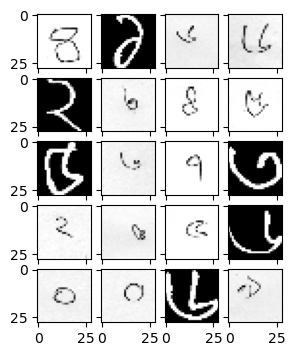

In [13]:

img_list = []
no_samples_to_Show = 20
# Select random images from X_train
random_indices = random.sample(range(X_train.shape[0]), no_samples_to_Show)

for i in random_indices:
    img_list.append(X_train[i])

fig = plt.figure(figsize=(4, 4))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 4), axes_pad=0.1)

for ax, im in zip(grid, img_list):
    ax.imshow(im, 'grey')

plt.show()

## CNN Model Building 

In [14]:
def buildCNNmodel(no_classes):

    No_CLASSES = no_classes

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(No_CLASSES, activation='softmax')
    ])

    optimizer = 'adam'

    model.compile(optimizer=optimizer, 
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    return model

In [15]:
# Convert one-hot encoded labels to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

CNNmodel = buildCNNmodel(no_classes=10)

CNNmodel.summary()

c:\Users\Arnab Gupta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

CNNmodel.fit(X_train, y_train_int, 
          epochs=150, 
          validation_split=0.2, 
          batch_size=32,
          callbacks=[early_stopping])

Epoch 1/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4064 - loss: 1.7469 - val_accuracy: 0.6941 - val_loss: 1.1061
Epoch 2/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7246 - loss: 0.9916 - val_accuracy: 0.7602 - val_loss: 0.8441
Epoch 3/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7714 - loss: 0.7838 - val_accuracy: 0.7760 - val_loss: 0.7697
Epoch 4/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7890 - loss: 0.6994 - val_accuracy: 0.7857 - val_loss: 0.7099
Epoch 5/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8064 - loss: 0.6272 - val_accuracy: 0.7967 - val_loss: 0.6715
Epoch 6/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8188 - loss: 0.5822 - val_accuracy: 0.7986 - val_loss: 0.6929
Epoch 7/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.8238 - loss: 0.5580 - val_accuracy: 0.7895 - val_loss: 0.6995
Epoch 8/150
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 

In [17]:
eval_loss, eval_acc = CNNmodel.evaluate(X_train, y_train_int)

print(f"Eval Loss For Train    :    {eval_loss * 100:.2f}")
print(f"Eval Accuracy Percentage For Train    :    {eval_acc * 100:.2f}")

1689/1689 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9800 - loss: 0.1094
Eval Loss For Train    :    57.78
Eval Accuracy Percentage For Train    :    94.32


In [18]:
eval_loss, eval_acc = CNNmodel.evaluate(X_test, y_test_int)

print(f"Eval Loss For Test    :    {eval_loss * 100:.2f}")
print(f"Eval Accuracy Percentage For Test    :    {eval_acc * 100:.2f}")

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7765 - loss: 2.6626
Eval Loss For Test    :    265.45
Eval Accuracy Percentage For Test    :    77.77


In [19]:
with open("bengali_mnist_cnn_model.pkl", "wb") as f:
    pickle.dump(CNNmodel, f)

## MLP Image Processing

In [20]:
# def buildMLPmodel(no_classes):

#     No_CLASSES = no_classes

#     model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dense(No_CLASSES, activation='softmax')
#     ])

#     model.compile(optimizer='adam',
#                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                   metrics=['accuracy'])
    
#     return model



In [21]:
# model = buildMLPmodel(no_classes=10)

# model.fit(X_train, y_train_int, 
#           epochs=100, 
#           validation_split=0.2, 
#           batch_size=32,
#           callbacks=[early_stopping]
#         )


In [22]:
# eval_loss, eval_acc = model.evaluate(X_train, y_train_int)

# print(f"Eval Loss For Train    :    {eval_loss * 100:.2f}")
# print(f"Eval Accuracy Percentage For Train    :    {eval_acc * 100:.2f}")


In [23]:
# eval_loss, eval_acc = model.evaluate(X_test, y_test_int)

# print(f"Eval Loss For Test    :    {eval_loss * 100:.2f}")
# print(f"Eval Accuracy Percentage For Test    :    {eval_acc * 100:.2f}")